In [15]:
using RDatasets
using CSV, DataFrames
using MLLabelUtils
using Plots
using Evolutive
using Clustering
using LinearAlgebra
using Random

In [16]:
# preparo el dataset
begin
    iris = dataset("datasets", "iris")

    # Obtener las especies únicas en la columna "Species"
    especies_unicas = unique(iris.Species)

    # Crear un diccionario que asigne una etiqueta numérica a cada especie
    etiquetas = Dict(especie => i for (i, especie) in enumerate(especies_unicas))

    # Convertir las especies en etiquetas numéricas
    clusters_reales = [etiquetas[especie] for especie in iris.Species]

    iris_data = Matrix(iris[:, Not(:Species)])
end

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 ⋮              
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [17]:
Random.seed!(1234)
# realizo GKA
K = 3
popsize = 10
max_gen = 50
p = 0.15
clusters_gka = GeneticKMeans(iris_data, K, popsize, max_gen, p)

50-element Vector{Vector{Int64}}:
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 1, 2, 2, 2, 1, 2, 2, 1]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
 ⋮
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  2, 2, 2, 2, 2, 2, 

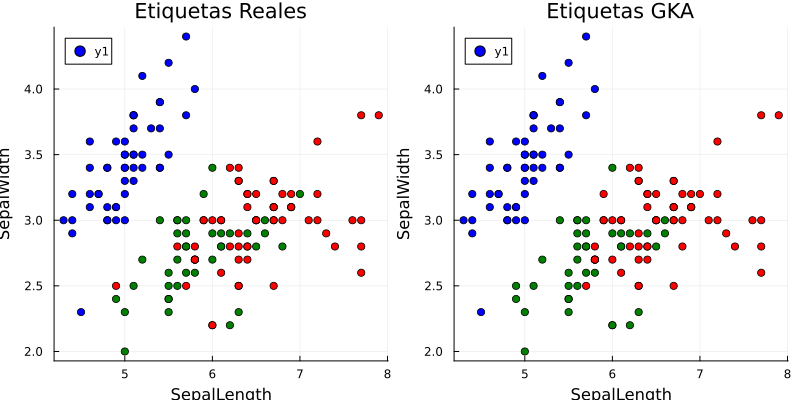

In [22]:
# grafico como me queda el GKA en la ultima generacion (notar que los colores pueden estan rotados)
begin 
    # Matriz de datos (X) con las primeras dos características (SepalLength y SepalWidth)
    X = iris[:, 1:2]

    # Definir colores para cada etiqueta
    colores_1 = Dict(1 => "blue", 2 => "green", 3 => "red")

    # Definir colores para cada etiqueta
    colores_2 = Dict(3 => "blue", 1 => "green", 2 => "red")

    # Crear una lista de colores basada en las etiquetas reales
    colores_reales = [colores_1[e] for e in clusters_reales]

    # Crear una lista de colores basada en los clústeres asignados
    colores_gka = [colores_2[c] for c in clusters_gka[end]]

    p1 = scatter(X[:, 1], X[:, 2], color=colores_reales, legend=:topleft, 
        title="Etiquetas Reales", xlabel="SepalLength", ylabel="SepalWidth", 
        marker=:circle, size=(800, 400))

    # Graficar con las etiquetas asignadas por K-means
    p2 = scatter(X[:, 1], X[:, 2], color=colores_gka, legend=:topleft, 
        title="Etiquetas GKA", xlabel="SepalLength", ylabel="SepalWidth", 
        marker=:circle, size=(800, 400))

    # Mostrar ambos gráficos uno al lado del otro
    plot(p1, p2, layout=(1, 2))
end

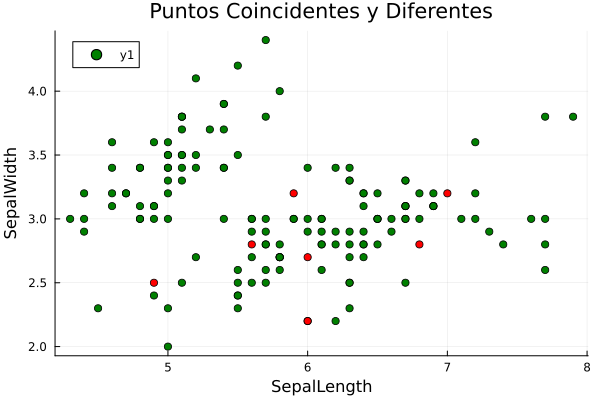

In [23]:
begin
    # Identificar puntos donde coinciden y donde difieren
    coinciden = colores_reales .== colores_gka

    # Crear una lista de colores basada en la coincidencia de etiquetas
    colores = [coinciden[i] ? "green" : "red" for i in 1:length(coinciden)]

    # Graficar
    scatter(X[:, 1], X[:, 2], color=colores, legend=:topleft, 
        title="Puntos Coincidentes y Diferentes", xlabel="SepalLength", ylabel="SepalWidth", 
        marker=:circle)
end

In [24]:
accuracy = sum(coinciden) / length(coinciden)

0.92

In [25]:
Random.seed!(1234)

result = kmeans(iris_data', K)

# Los centros de los clústeres
centroids_K = result.centers

# Asignaciones de clúster para cada punto
clusters_K = result.assignments

150-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 2
 3
 2
 2
 2
 3
 2
 2
 3

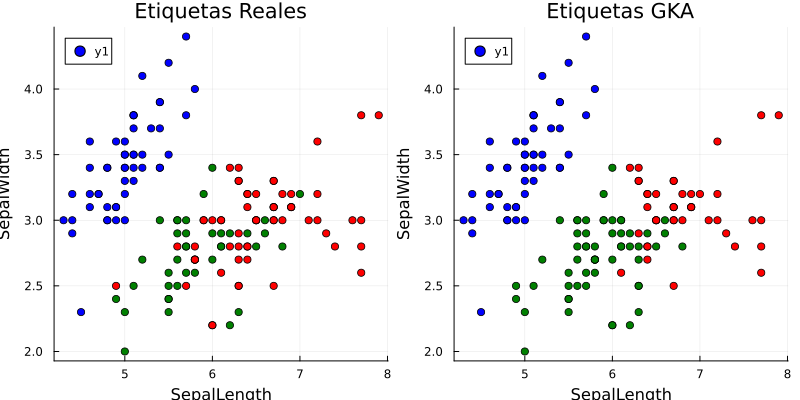

In [26]:
# grafico como me queda el GKA en la ultima generacion (notar que los colores pueden estan rotados)
begin 
    # Matriz de datos (X) con las primeras dos características (SepalLength y SepalWidth)
    X = iris[:, 1:2]

    # Definir colores para cada etiqueta
    colores_1 = Dict(1 => "blue", 2 => "green", 3 => "red")

    # Definir colores para cada etiqueta
    colores_2 = Dict(1 => "blue", 3 => "green", 2 => "red")

    # Crear una lista de colores basada en las etiquetas reales
    colores_reales = [colores_1[e] for e in clusters_reales]

    # Crear una lista de colores basada en los clústeres asignados
    colores_gka = [colores_2[c] for c in clusters_K]

    p1 = scatter(X[:, 1], X[:, 2], color=colores_reales, legend=:topleft, 
        title="Etiquetas Reales", xlabel="SepalLength", ylabel="SepalWidth", 
        marker=:circle, size=(800, 400))

    # Graficar con las etiquetas asignadas por K-means
    p2 = scatter(X[:, 1], X[:, 2], color=colores_gka, legend=:topleft, 
        title="Etiquetas GKA", xlabel="SepalLength", ylabel="SepalWidth", 
        marker=:circle, size=(800, 400))

    # Mostrar ambos gráficos uno al lado del otro
    plot(p1, p2, layout=(1, 2))
end

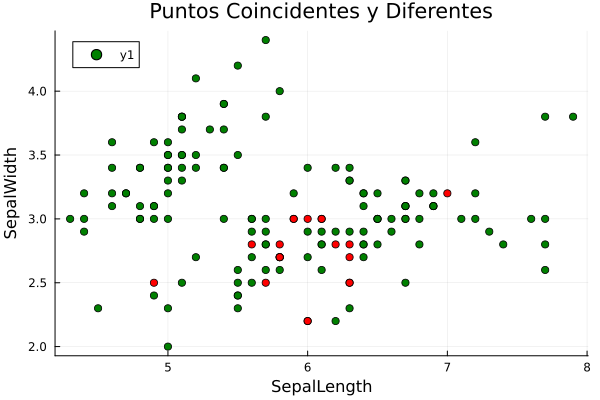

In [27]:
begin
    # Identificar puntos donde coinciden y donde difieren
    coinciden = colores_reales .== colores_gka

    # Definir colores para los puntos coincidentes y diferentes
    colores_coinciden = "green"
    colores_difieren = "red"

    # Crear una lista de colores basada en la coincidencia de etiquetas
    colores = [coinciden[i] ? colores_coinciden : colores_difieren for i in 1:length(coinciden)]

    # Graficar
    scatter(X[:, 1], X[:, 2], color=colores, legend=:topleft, 
        title="Puntos Coincidentes y Diferentes", xlabel="SepalLength", ylabel="SepalWidth", 
        marker=:circle)
end

In [28]:
accuracy = sum(coinciden) / length(coinciden)

0.8866666666666667

Ahora probemos con otra semilla

In [29]:
Random.seed!(340)

result = kmeans(iris_data', K)

# Los centros de los clústeres
centroids_K = result.centers

# Asignaciones de clúster para cada punto
clusters_K = result.assignments

150-element Vector{Int64}:
 2
 2
 2
 2
 2
 3
 2
 2
 2
 2
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1

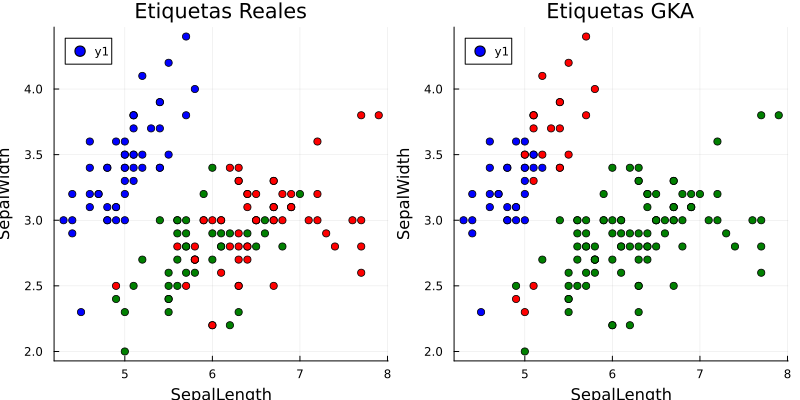

In [30]:
# grafico como me queda el GKA en la ultima generacion (notar que los colores pueden estan rotados)
begin 
    # Matriz de datos (X) con las primeras dos características (SepalLength y SepalWidth)
    X = iris[:, 1:2]

    # Definir colores para cada etiqueta
    colores_1 = Dict(1 => "blue", 2 => "green", 3 => "red")

    # Definir colores para cada etiqueta
    colores_2 = Dict(2 => "blue", 1 => "green", 3 => "red")

    # Crear una lista de colores basada en las etiquetas reales
    colores_reales = [colores_1[e] for e in clusters_reales]

    # Crear una lista de colores basada en los clústeres asignados
    colores_gka = [colores_2[c] for c in clusters_K]

    p1 = scatter(X[:, 1], X[:, 2], color=colores_reales, legend=:topleft, 
        title="Etiquetas Reales", xlabel="SepalLength", ylabel="SepalWidth", 
        marker=:circle, size=(800, 400))

    # Graficar con las etiquetas asignadas por K-means
    p2 = scatter(X[:, 1], X[:, 2], color=colores_gka, legend=:topleft, 
        title="Etiquetas GKA", xlabel="SepalLength", ylabel="SepalWidth", 
        marker=:circle, size=(800, 400))

    # Mostrar ambos gráficos uno al lado del otro
    plot(p1, p2, layout=(1, 2))
end

Notar que dependiendo de como son sorteados los centroides inicialmente los clusters pueden quedar muy mal. 

Veamos que pasa si realizo GKA teniendo como poblacion inicial todas distribuciones como en la que termino el K-means de arriba.

In [31]:
# realizo GKA
K = 3
popsize = 10
max_gen = 50
p = 0.15
clusters_gka = GeneticKMeans(iris_data, K, popsize, max_gen, p, poblacion_inicial = clusters_K)

50-element Vector{Vector{Int64}}:
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 ⋮
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 3, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 3, 1, 1, 1, 1, 1, 1, 1]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 

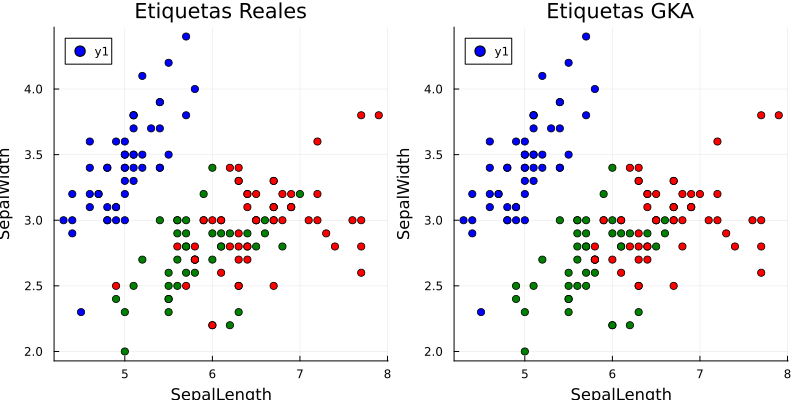

In [33]:
# grafico como me queda el GKA en la ultima generacion (notar que los colores pueden estan rotados)
begin 
    # Matriz de datos (X) con las primeras dos características (SepalLength y SepalWidth)
    X = iris[:, 1:2]

    # Definir colores para cada etiqueta
    colores_1 = Dict(1 => "blue", 2 => "green", 3 => "red")

    # Definir colores para cada etiqueta
    colores_2 = Dict(2 => "blue", 3 => "green", 1 => "red")

    # Crear una lista de colores basada en las etiquetas reales
    colores_reales = [colores_1[e] for e in clusters_reales]

    # Crear una lista de colores basada en los clústeres asignados
    colores_gka = [colores_2[c] for c in clusters_gka[end]]

    p1 = scatter(X[:, 1], X[:, 2], color=colores_reales, legend=:topleft, 
        title="Etiquetas Reales", xlabel="SepalLength", ylabel="SepalWidth", 
        marker=:circle, size=(800, 400))

    # Graficar con las etiquetas asignadas por K-means
    p2 = scatter(X[:, 1], X[:, 2], color=colores_gka, legend=:topleft, 
        title="Etiquetas GKA", xlabel="SepalLength", ylabel="SepalWidth", 
        marker=:circle, size=(800, 400))

    # Mostrar ambos gráficos uno al lado del otro
    plot(p1, p2, layout=(1, 2))
end

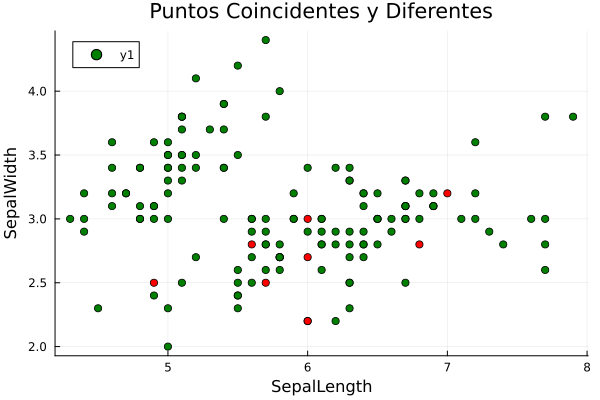

In [34]:
begin
    # Identificar puntos donde coinciden y donde difieren
    coinciden = colores_reales .== colores_gka

    # Crear una lista de colores basada en la coincidencia de etiquetas
    colores = [coinciden[i] ? "green" : "red" for i in 1:length(coinciden)]

    # Graficar
    scatter(X[:, 1], X[:, 2], color=colores, legend=:topleft, 
        title="Puntos Coincidentes y Diferentes", xlabel="SepalLength", ylabel="SepalWidth", 
        marker=:circle)
end

In [35]:
accuracy = sum(coinciden) / length(coinciden)

0.92

Por lo que podemos concluir que la capacidad de mutar en GKA "salva" la clusterizacion creada por K-Means. Ya que puntos que estan a distancia similar de dos centroides tienen altas chances de cambiar de cluster, y asi poder ir ubicando bien los clusters